In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load Dataset 
url = "https://raw.githubusercontent.com/sanjida-akhtar/maternal-health-analysis/main/data/maternal_health.csv"
df = pd.read_csv(url)
df.head()

,Division,District,Year,Month,Total,ANC1(%),ANC2(%),ANC3(%),ANC4(%),ANC1,...,Ceasarean,Total Death,Maternal Death(%),Maternal Death,Maternal Death Review,Total PNC,PNC1(%),PNC2(%),PNC1,PNC2
0,Sylhet,Sunamganj,2024,January,2442,45.126945,21.089271,14.782965,19.000819,1102,...,80,0,0.0,0,0,1549,61.781795,38.218205,957,592
1,Sylhet,Sunamganj,2024,February,1250,0.000000,40.800000,28.480000,30.720000,0,...,65,0,0.0,0,0,1178,64.685908,35.314092,762,416
2,Sylhet,Sunamganj,2024,March,2320,48.405172,23.836207,14.784483,12.974138,1123,...,64,0,0.0,0,0,1169,55.603080,44.396920,650,519
3,Sylhet,Sunamganj,2024,April,2148,49.301676,22.532588,13.594041,14.571695,1059,...,64,2,50.0,1,1,1150,63.391304,36.608696,729,421
4,Sylhet,Sunamganj,2024,May,2191,45.093565,23.961661,14.194432,16.750342,988,...,55,4,50.0,2,2,1052,65.114068,34.885932,685,367


In [40]:
# Copy the dataset
data = df.copy()
data.head()

,Division,District,Year,Month,Total,ANC1(%),ANC2(%),ANC3(%),ANC4(%),ANC1,...,Ceasarean,Total Death,Maternal Death(%),Maternal Death,Maternal Death Review,Total PNC,PNC1(%),PNC2(%),PNC1,PNC2
0,Sylhet,Sunamganj,2024,January,2442,45.126945,21.089271,14.782965,19.000819,1102,...,80,0,0.0,0,0,1549,61.781795,38.218205,957,592
1,Sylhet,Sunamganj,2024,February,1250,0.000000,40.800000,28.480000,30.720000,0,...,65,0,0.0,0,0,1178,64.685908,35.314092,762,416
2,Sylhet,Sunamganj,2024,March,2320,48.405172,23.836207,14.784483,12.974138,1123,...,64,0,0.0,0,0,1169,55.603080,44.396920,650,519
3,Sylhet,Sunamganj,2024,April,2148,49.301676,22.532588,13.594041,14.571695,1059,...,64,2,50.0,1,1,1150,63.391304,36.608696,729,421
4,Sylhet,Sunamganj,2024,May,2191,45.093565,23.961661,14.194432,16.750342,988,...,55,4,50.0,2,2,1052,65.114068,34.885932,685,367


In [41]:
# Drop unnecessary columns
data.drop(["Division", "District ", "Year", "Month", "Total", "Total Death", "ANC1", "ANC2", "ANC3", "ANC4", "NVD", "Ceasarean", "Maternal Death",
           "Maternal Death Review", "Total PNC","PNC1", "PNC2"], axis = 1, inplace=True)


In [42]:
# Rename columns
data.rename(columns = {"ANC1(%)": "ANC1", "ANC2(%)" : "ANC2", "ANC3(%)" : "ANC3", "ANC4(%)": "ANC4",
                       "NVD(%)": "NVD", "Ceasarean(%)" : "Ceasarean", "Maternal Death(%)" : "Maternal Death", 
                       "PNC1(%)": "PNC1", "PNC2(%)" : "PNC2"}, inplace = True)

In [43]:
# Display the shape of dataset
data.shape

(768, 10)

In [11]:
# Display basic information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ANC1            768 non-null    float64
 1   ANC2            768 non-null    float64
 2   ANC3            768 non-null    float64
 3   ANC4            768 non-null    float64
 4   Delivery        768 non-null    int64  
 5   NVD             768 non-null    float64
 6   Ceasarean       768 non-null    float64
 7   Maternal Death  768 non-null    float64
 8   PNC1            768 non-null    float64
 9   PNC2            768 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 60.1 KB


In [13]:
# Display statistical summary of the dataset
data.describe(include="all")

,ANC1,ANC2,ANC3,ANC4,Delivery,NVD,Ceasarean,Maternal Death,PNC1,PNC2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,54.721310,19.480038,13.910507,11.888145,1738.763021,66.373898,32.818708,30.461343,67.009158,32.990842
std,23.866820,9.930063,7.662668,7.418571,3012.504018,18.856763,19.109460,42.377881,11.310203,11.310203
min,0.000000,0.000000,0.000000,0.000000,188.000000,21.310602,0.925926,0.000000,29.339853,1.968971
25%,38.975634,17.558643,10.661900,7.670239,612.500000,48.849977,19.019881,0.000000,58.599603,24.927730
50%,46.020584,24.023734,16.039306,12.561469,849.000000,70.354857,28.131406,0.000000,66.589797,33.410203
75%,60.818056,25.744774,19.310064,16.642376,1099.250000,80.315254,50.208025,57.440476,75.072270,41.400397
max,100.000000,40.800000,34.791077,33.854131,20825.000000,98.703704,73.067535,100.000000,98.031029,70.660147


In [9]:
# Check for data types of all variables
data.dtypes

ANC1              float64
ANC2              float64
ANC3              float64
ANC4              float64
Delivery            int64
NVD               float64
Ceasarean         float64
Maternal Death    float64
PNC1              float64
PNC2              float64
dtype: object

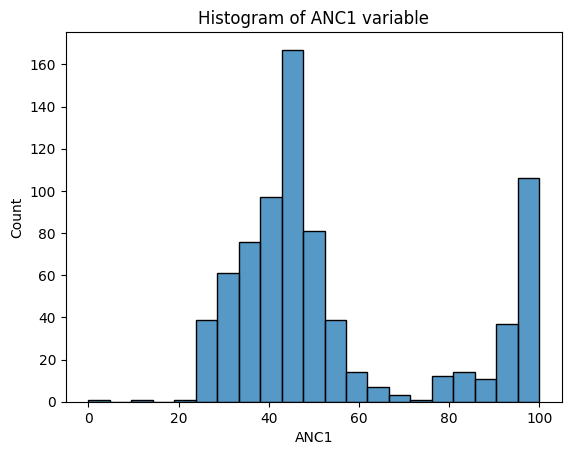

In [14]:
# Display the histogram of ANC1 
sns.histplot(x = data["ANC1"], data = data)
plt.xlabel("ANC1")
plt.title("Histogram of ANC1 variable")
plt.show()

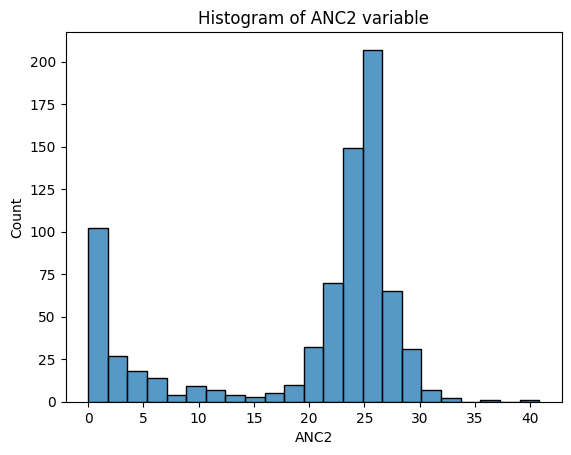

In [15]:
# Display the histogram of ANC2 
sns.histplot(x = data["ANC2"], data = data)
plt.xlabel("ANC2")
plt.title("Histogram of ANC2 variable")
plt.show()

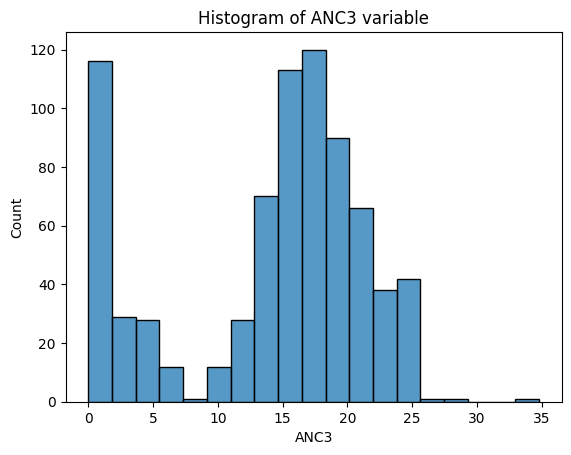

In [16]:
# Display the histogram of ANC3
sns.histplot(x = data["ANC3"], data = data)
plt.xlabel("ANC3")
plt.title("Histogram of ANC3 variable")
plt.show()

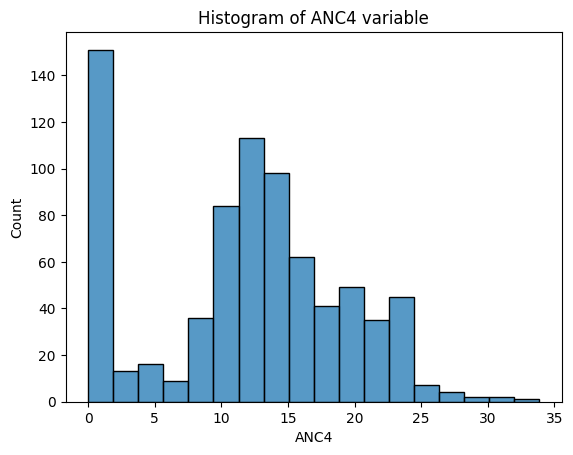

In [17]:
# Display the histogram of ANC4
sns.histplot(x = data["ANC4"], data = data)
plt.xlabel("ANC4")
plt.title("Histogram of ANC4 variable")
plt.show()

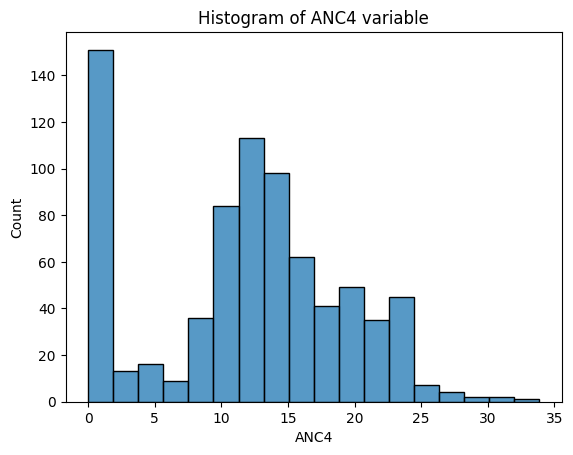

In [18]:
# Display the histogram of ANC4
sns.histplot(x = data["ANC4"], data = data)
plt.xlabel("ANC4")
plt.title("Histogram of ANC4 variable")
plt.show()

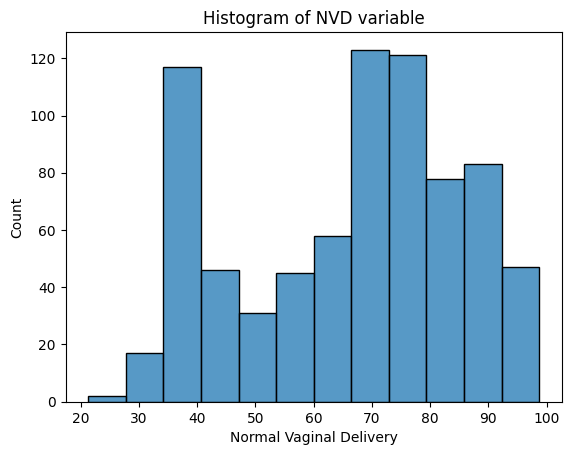

In [19]:
# Display the histogram of NVD
sns.histplot(x = data["NVD"], data = data)
plt.xlabel("Normal Vaginal Delivery")
plt.title("Histogram of NVD variable")
plt.show()

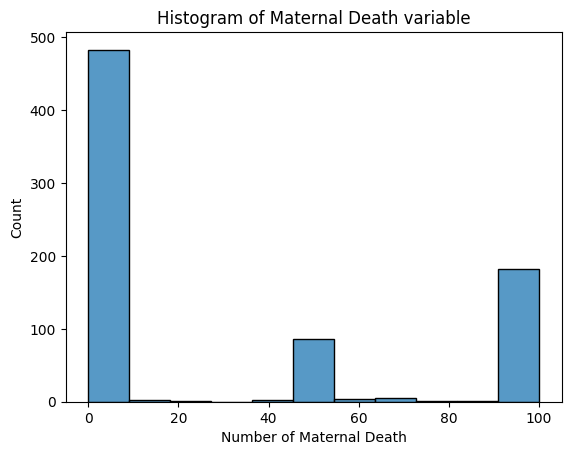

In [20]:
sns.histplot(x = data["Maternal Death"], data = data)
plt.xlabel("Number of Maternal Death")
plt.title("Histogram of Maternal Death variable")
plt.show()

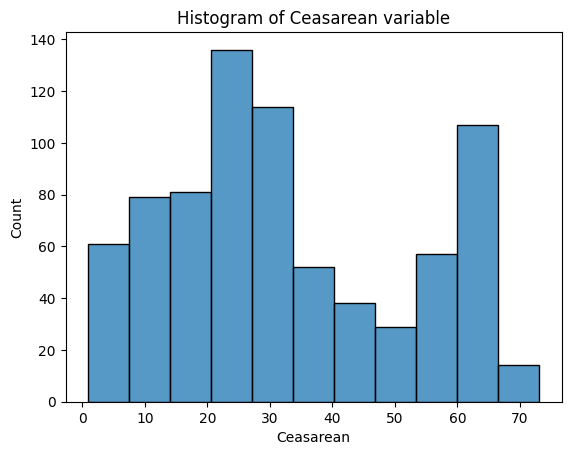

In [21]:
# Display the histogram of Ceasarean
sns.histplot(x = data["Ceasarean"], data = data)
plt.xlabel("Ceasarean")
plt.title("Histogram of Ceasarean variable")
plt.show()

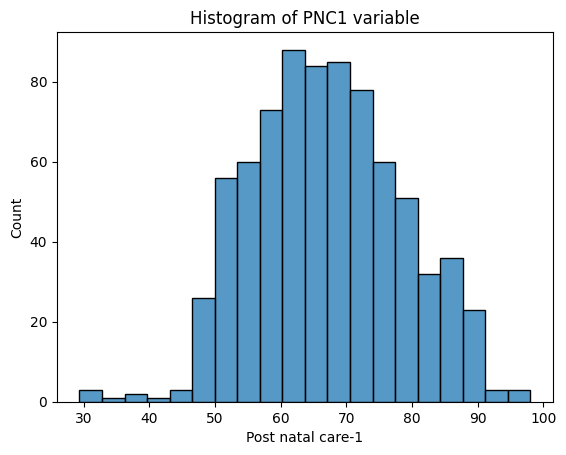

In [22]:
# Display the histogram of ANC3
sns.histplot(x = data["PNC1"], data = data)
plt.xlabel("Post natal care-1")
plt.title("Histogram of PNC1 variable")
plt.show()

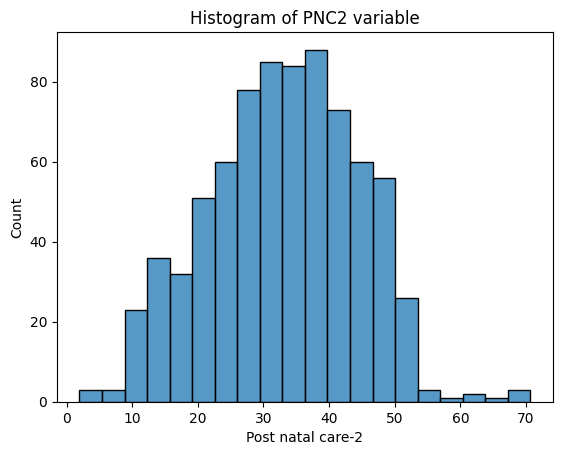

In [23]:
# Display the histogram of ANC3
sns.histplot(x = data["PNC2"], data = data)
plt.xlabel("Post natal care-2")
plt.title("Histogram of PNC2 variable")
plt.show()

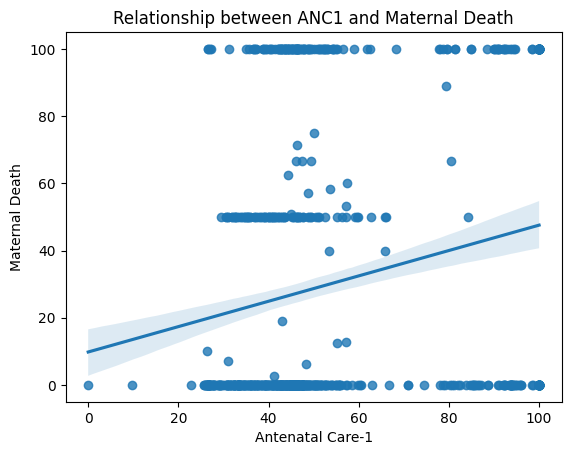

In [24]:
# Bivariate EDA

sns.regplot(x = data["ANC1"],  y= data["Maternal Death"], data = data)
plt.xlabel("Antenatal Care-1")
plt.ylabel("Maternal Death")
plt.title("Relationship between ANC1 and Maternal Death")
plt.show()

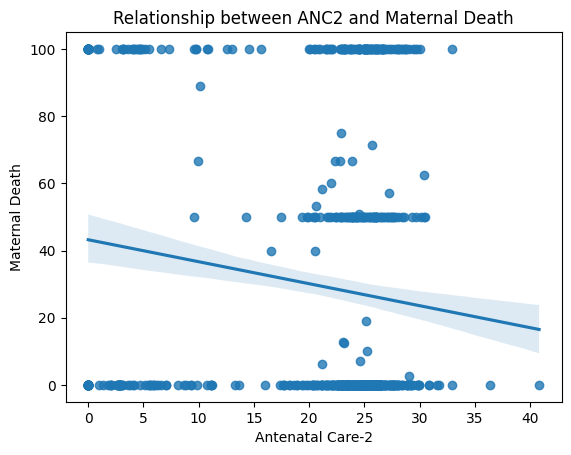

In [25]:
sns.regplot(x = data["ANC2"],  y= data["Maternal Death"], data = data)
plt.xlabel("Antenatal Care-2")
plt.ylabel("Maternal Death")
plt.title("Relationship between ANC2 and Maternal Death")
plt.show()

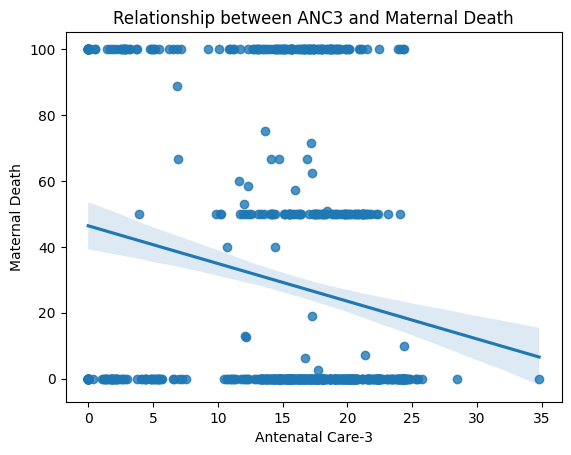

In [26]:
sns.regplot(x = data["ANC3"],  y= data["Maternal Death"], data = data)
plt.xlabel("Antenatal Care-3")
plt.ylabel("Maternal Death")
plt.title("Relationship between ANC3 and Maternal Death")
plt.show()

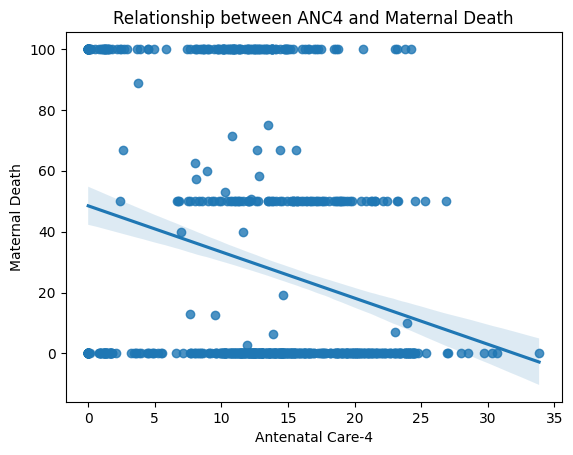

In [28]:
sns.regplot(x = data["ANC4"],  y= data["Maternal Death"], data = data)
plt.xlabel("Antenatal Care-4")
plt.ylabel("Maternal Death")
plt.title("Relationship between ANC4 and Maternal Death")
plt.show()

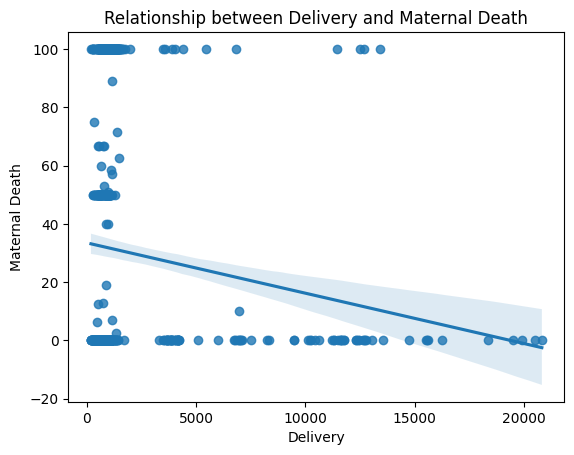

In [29]:
sns.regplot(x = data["Delivery"],  y= data["Maternal Death"], data = data)
plt.xlabel("Delivery")
plt.ylabel("Maternal Death")
plt.title("Relationship between Delivery and Maternal Death")
plt.show()

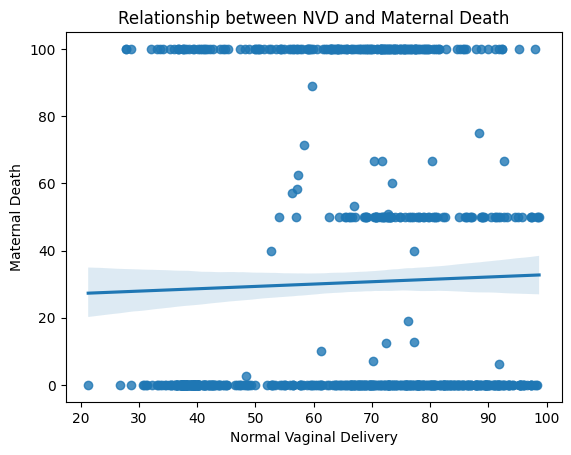

In [30]:
sns.regplot(x = data["NVD"],  y= data["Maternal Death"], data = data)
plt.xlabel("Normal Vaginal Delivery")
plt.ylabel("Maternal Death")
plt.title("Relationship between NVD and Maternal Death")
plt.show()

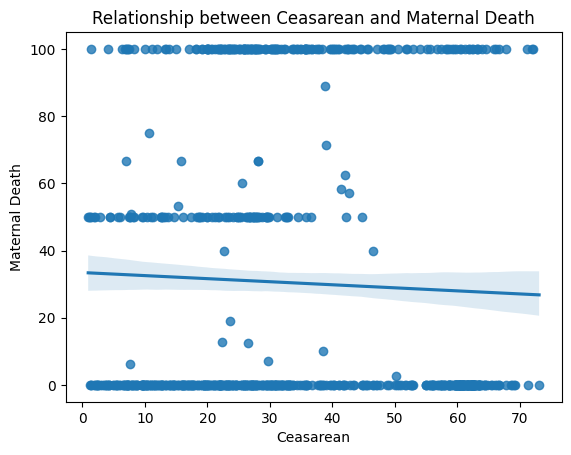

In [31]:
sns.regplot(x = data["Ceasarean"],  y= data["Maternal Death"], data = data)
plt.xlabel("Ceasarean")
plt.ylabel("Maternal Death")
plt.title("Relationship between Ceasarean and Maternal Death")
plt.show()

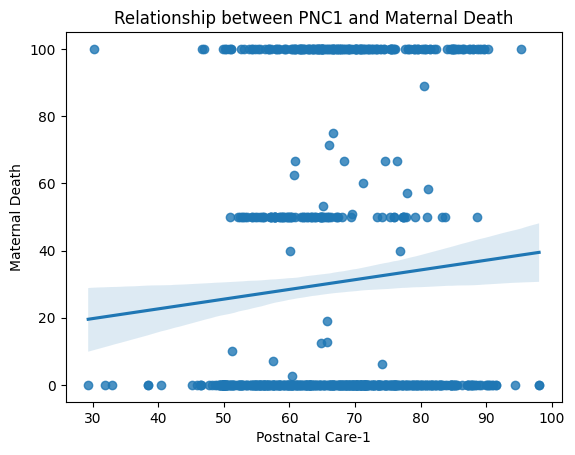

In [32]:
sns.regplot(x = data["PNC1"],  y= data["Maternal Death"], data = data)
plt.xlabel("Postnatal Care-1")
plt.ylabel("Maternal Death")
plt.title("Relationship between PNC1 and Maternal Death")
plt.show()

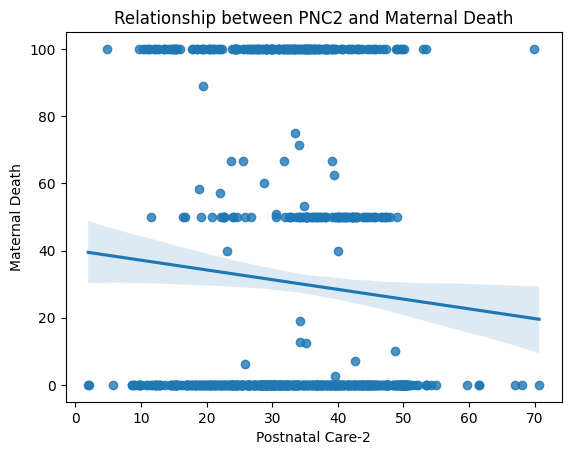

In [34]:
sns.regplot(x = data["PNC2"],  y= data["Maternal Death"], data = data)
plt.xlabel("Postnatal Care-2")
plt.ylabel("Maternal Death")
plt.title("Relationship between PNC2 and Maternal Death")
plt.show()

In [45]:
# Find correlation among variables
cor = data.corr()

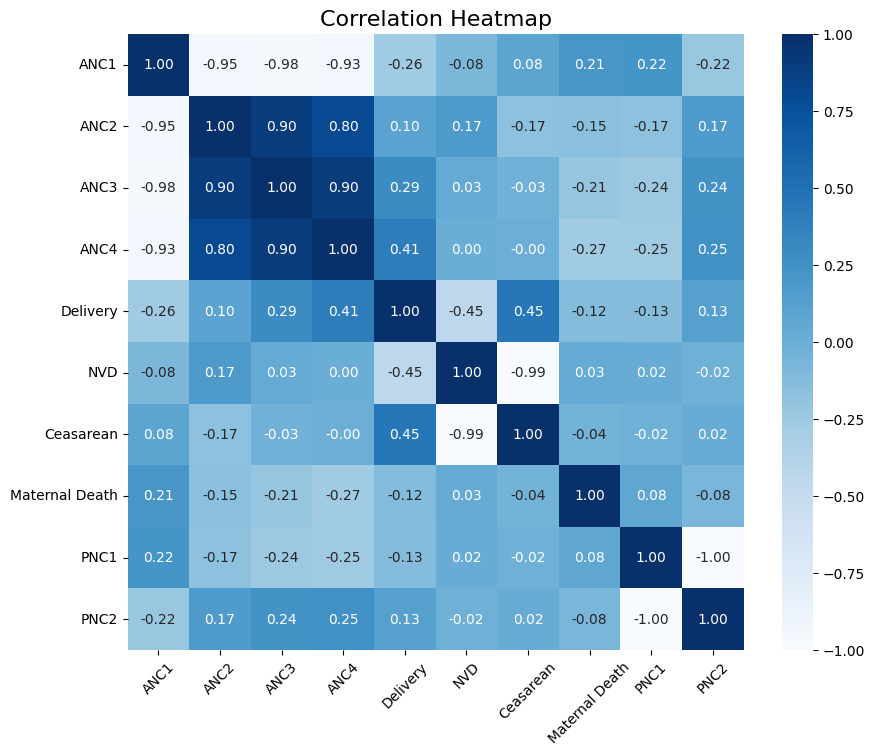

In [51]:
# Create heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cor, cmap = "Blues", annot = True, square = True, center = 0, fmt = ".2f")
plt.title("Correlation Heatmap", fontsize = 16)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()